## Titanic Classification Project Part 1

### Introduction to the Project - Videos and Background

The RMS Titanic sank in the early morning hours of 15 April 1912 in the North Atlantic Ocean, four days into her maiden voyage from Southampton to New York City. The largest ocean liner in service at the time, Titanic had an estimated 2,224 people on board when she struck an iceberg at around 23:40 (ship's time) on Sunday, 14 April 1912. Her sinking two hours and forty minutes later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the deaths of more than 1,500 people, making it one of the deadliest peacetime maritime disasters in history. [(wikipedia)](https://en.wikipedia.org/wiki/Sinking_of_the_Titanic)

Setting the stage with some videos: https://www.youtube.com/watch?v=3lyiZMeTKIo and
https://www.youtube.com/watch?v=ItjXTieWKyI 

The files uploaded in this folder contain data for real Titanic passengers. Each row represents one person. The columns (features) describe different attributes about the person including whether they survived (`0=No`), their age, their passenger-class (`1=1st Class, Upper`), gender, and the fare they paid (£s*).

**Overall Goal of this Project (what we are working toward)**: perform machine learning on the titanic dataset to predict which passengers will survive based on the information we have on each passenger.  


Technical Goals of part 1 of the project:
* Understand all of the imports, and start checking out new libraries [sklearn](https://scikit-learn.org/stable/), [matplotlib](https://matplotlib.org/), and [seaborn](https://seaborn.pydata.org/).
* Learn how to get to know and describe a dataset using [pandas](https://pandas.pydata.org/).
* Become a pandas expert in data exploration.
* Learn basic visualization in statistics using [matplotlib](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/).
* Learn an important component of data preprocessing in supervised machine learning: [dummy variables](https://stattrek.com/multiple-regression/dummy-variables.aspx)
* Learn how to write in markdown, which will help you learn Latex and write awesome github readmes in the future: [markdown] (https://www.markdownguide.org/basic-syntax/)

#### Imports (libraries we will learn and use!)

In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier as knn

#try changing this at the end of the project
#plt.style.use('ggplot')

### Problem 1: Load and understand the key aspects of the data

Your first task is to conduct some preprocessing steps and provide comments in your code to describe the following:
1. Load the `titanic_data.csv` file into a pandas data frame.
2. Find out how many passengers are in the file. Th
3. List all of the "features" in the file.
4. Use pandas' .describe() function to learn about the dataset.
5. Use pandas' .head() function to check out the first few rows.
6. Use pandas' .tail() function to check out the last few rows.

In [3]:
# Step 1 Load the `titanic_data.csv` file into a pandas dataframe
titanic=pd.read_csv('titanic_data.csv')


In [4]:
# Step 2 Find out how many passengers are in the file. One trick is to use the count function!
titanic.value_counts()
titanic.count()

Survived                   887
Pclass                     887
Name                       887
Sex                        887
Age                        887
Siblings/Spouses Aboard    887
Parents/Children Aboard    887
Fare                       887
dtype: int64

In [5]:
# Step 3 List all of the "features" in the file
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [6]:
# Step 4 Use pandas'.describe() function to learn about the dataset.
titanic.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [7]:
# Step 5 Use pandas' .head() function to check out the first few rows.
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [8]:
# Step 6 Use pandas' .tail() function to check out the last 10 rows.
titanic.tail(10)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
877,0,3,Mr. Johann Markun,male,33.0,0,0,7.8958
878,0,3,Miss. Gerda Ulrika Dahlberg,female,22.0,0,0,10.5167
879,0,2,Mr. Frederick James Banfield,male,28.0,0,0,10.5000
880,0,3,Mr. Henry Jr Sutehall,male,25.0,0,0,7.0500
881,0,3,Mrs. William (Margaret Norton) Rice,female,39.0,0,5,29.1250
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.7500


#### Notes from this section:
write your notes here using markdown (double click on this slide)
hello the mean is lower than 0.5 :(

## Problem 2: Explore the Data
1. Explore the data provided (e.g., looking at pandas statistics (ie. using value_counts(), histograms, scatter plots, etc.)
2. Which column do you think is our target (the variable we are trying to predict)?
3. Which feature columns do you think will be good predictors of our target for machine learning?
4. How do you think age affects passengers' chances of survival?
5. What is the age distribution of survivors?
6. Create a hypothesis about the relationship between some of the feature data and the target. Do you think the feature data can be used to predict survival?

In [9]:
# Step 1 - Explore the data provided (e.g., looking at pandas statistics (ie. using value_counts(), histograms, scatter plots, etc.)
import matplotlib.pyplot as plt
import seaborn as sns

titanic['Pclass'].value_counts()

3    487
1    216
2    184
Name: Pclass, dtype: int64

In [0]:
# Step 2 - Which column do you think is our target (the variable we are trying to predict)?

Step 2: Write answer here using markdown.
Survived/ whether the passenger lived or not, basically 1 or 0.

In [33]:
# Step 3 - Which feature columns do you think will be good predictors of our target for machine learning?


Step 3: Write answer here using markdown. sex, age, Pclass

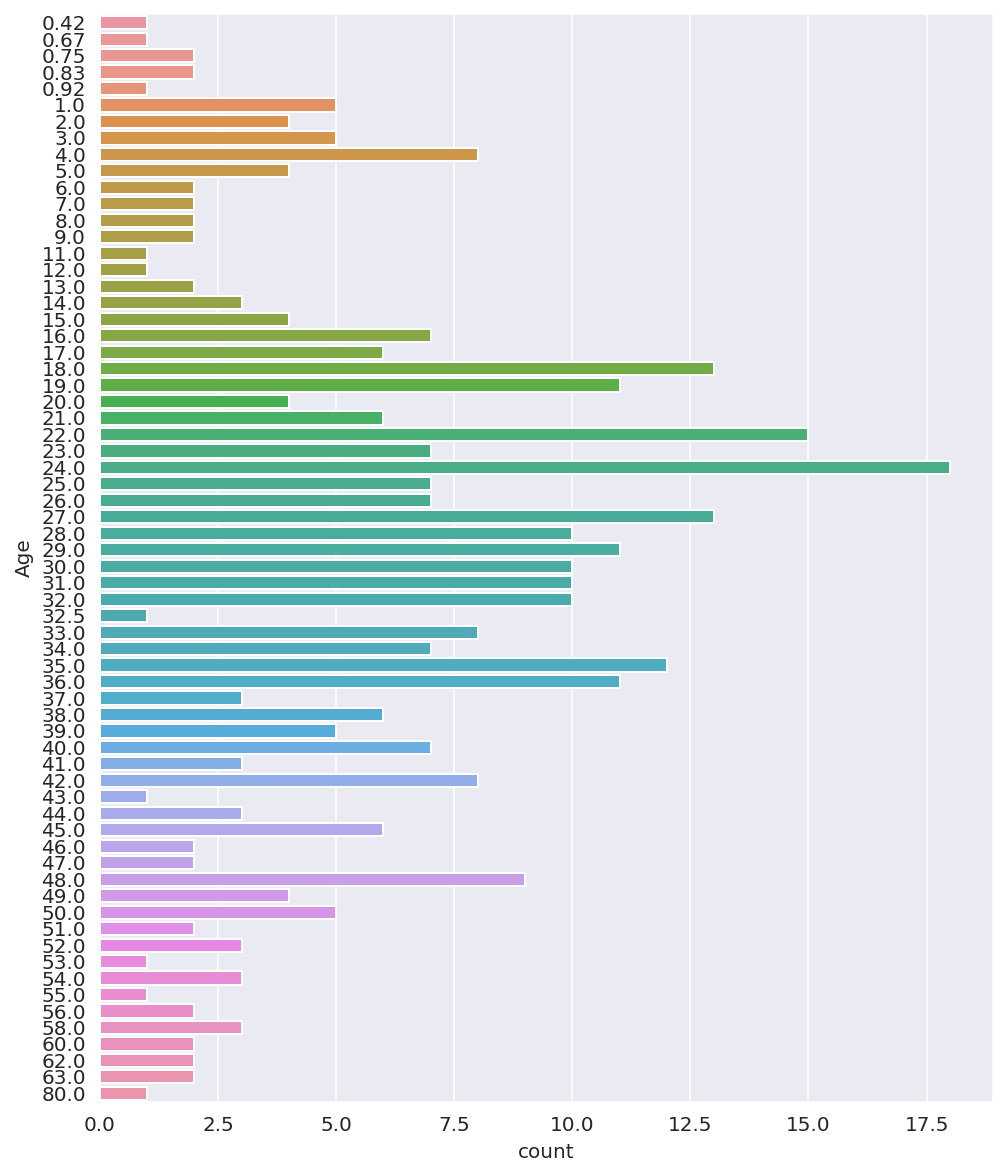

In [10]:
# Step 4 -  How do you think age affects passengers' chances of survival? (hint: to visually investigate correlation we tend to use scatter plots in data science, but the nature of our target data is binary which makes it more difficult. Try to make an age distribution of the passengers (using a histogram) that survived and see which age ranges seemed to do better.)

titanic_survived = titanic[titanic["Survived"]==1]
plt.figure(figsize=(8,10))
plt.style.use('dark_background')
sns.set_style('darkgrid')
ax = sns.countplot(y='Age', data=titanic_survived)

Step 4: Write a hypothesis here using markdown. You can make an educated guess toward how age and survival are related. slightly depending on the range for example, people whos ages are from maybe 5-12 would be considered children but since they can move themselves, they would have the highest probability of survival.

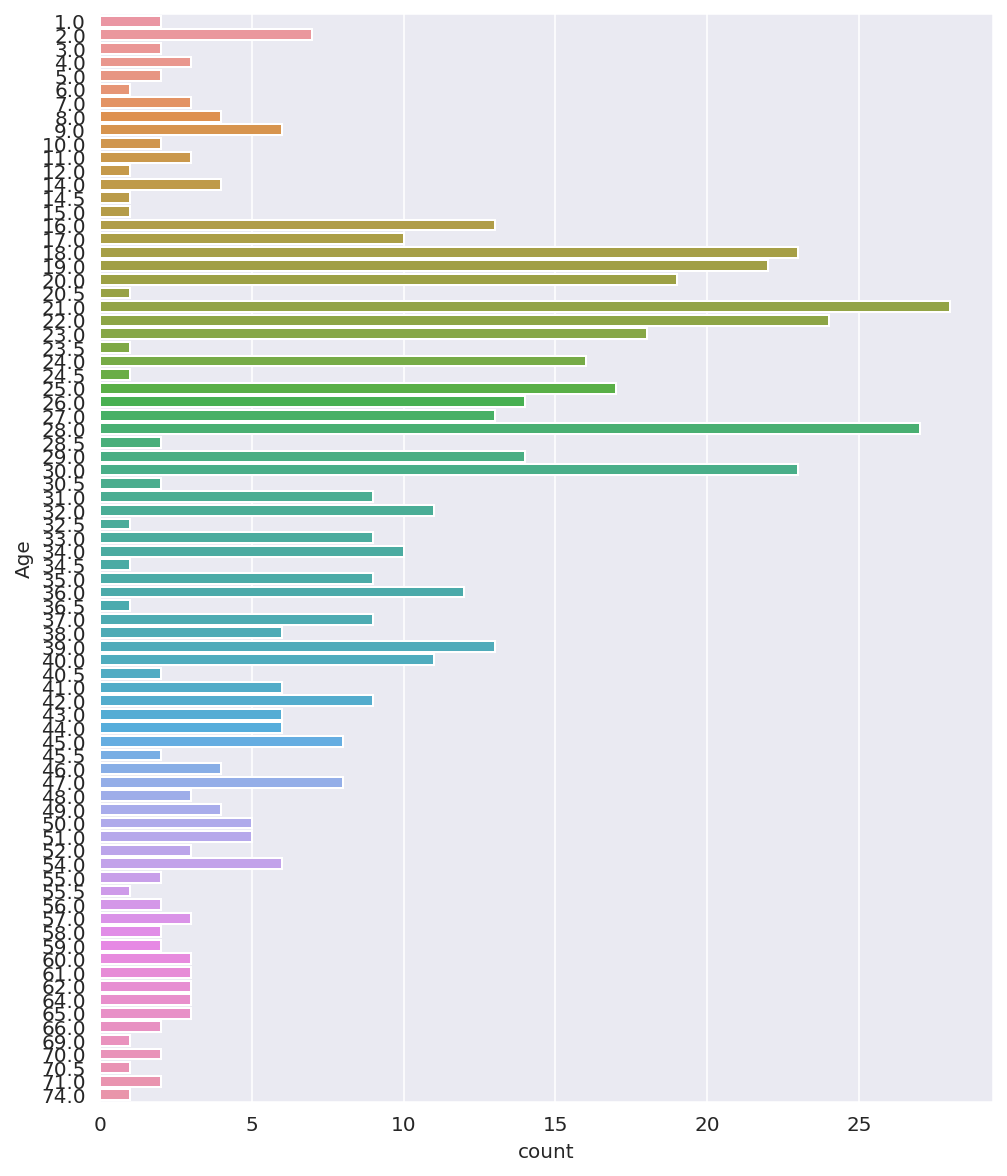

In [11]:
# Step 5 - What is the age distribution of the people who didn't survive? (hint: to determine the distribution of data, we love to use histograms in data science -- try using multiple data frames.)
titanic_did_not_survive = titanic[titanic["Survived"]==0]
plt.figure(figsize=(8,10))
plt.style.use('dark_background')
sns.set_style('darkgrid')
ax = sns.countplot(y='Age', data=titanic_did_not_survive)

In [0]:
# Step 6 - Create a hypothesis about the relationship between some of the feature data and the target. Do you think the feature data can be used to predict survival?

Step 6: Write hypothesis here using markdown: not enough information yet to make a good conclusion

#### Notes from this section: 
write your notes here using markdown.

### Problem 3: preprocess the data
The `Sex` column is categorical, meaning its data are separable into groups, but not numerical. To be able to work with this data, we need numbers, so you task is to transform the `Sex` column into numerical data with pandas' `get_dummies` feature and remove the original categorical `Sex` column. We want this column to be only zeros and ones so we can perform calculations on it for Machine Learning. In this case 0 could represent female and 1 could represent male, or vice versa!

Hint: I used pandas' `.replace()` function for this problem.


In [12]:
# Convert the categorical variables into dummy variables.
titanic['Sex'].replace(to_replace=["female", "male"], value=[0, 1], inplace=True)
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500


#### Extra Part
- Now, create a final dataframe to train on based off of the features we think are useful for machine learning. 

In [13]:
titanic_final = titanic[["Survived", "Age", "Pclass", "Sex"]]            #Pclass, Sex, Age, Survived
titanic_final.head(10)

,Survived,Age,Pclass,Sex
0,0,22.0,3,1
1,1,38.0,1,0
2,1,26.0,3,0
3,1,35.0,1,0
4,0,35.0,3,1
5,0,27.0,3,1
6,0,54.0,1,1
7,0,2.0,3,1
8,1,27.0,3,0
9,1,14.0,2,0


#### Notes from this section:

### Part 4: Discuss Machine Learning: Intro to Supervised Machine Learning

Now that we are pandas experts, we will take a step away from coding to discuss what Machine Learning is. The machine learning library we are going to be using is called [scikit-learn](https://scikit-learn.org/stable/). Our goal  for this week is to start learning about machine learning! Here are some questions we will research and address in class:
 
1. What are the three types of machine learning and what are the differences between them?

Supervised Learning: Labeled data and we have expected results to work with

Unsupervised Learning: Data is not labeled and have no expected results

Deep Learning: You use neural networks and it is more complex problem setting (pattern recognition, reinforcement learning)

2. What are some uses of machine learning? What type of machine learning seems the most interesting to you?

Ad recommendations, face detection through cameras. Deep learning seems most interesting since my mind also seems to like patterns such as tiles on the floor.

3. We will be using supervised machine learning for this project. Why do you think this dataset is a good candidate for supervised machine learning?

All the data is labeled(age, sex, Pclass, fare...) = we have the expected results(survived column)

4. Check out this [example](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting) and machine learning guide on scikit-learn. This page introduces some awesome vocabulary and talks about why we use machine learning and different types of learning problems. Which type of supervised learning problem does our project fall into?

classification since we are classifying survived or not survived.

#### Discussion Part 2 - Researching Important Concepts in Machine Learning

First, go through this [page](https://scikit-learn.org/stable/tutorial/basic/tutorial.html#machine-learning-the-problem-setting).

1. Data Preprocessing: Learn about what [training and testing splits](https://realpython.com/train-test-split-python-data/#supervised-machine-learning-with-train_test_split) are and write about your understanding here about why they are important. 

2. Machine Learning model evaluation: Check out what [confusion matrices](https://glassboxmedicine.com/2019/02/17/measuring-performance-the-confusion-matrix/) are and define the following terms in your own words:
    - Confusion Matrix:

    - True Positives (TP):

    - True Negatives (TN):

    - False Positives (FP):

    - False Negatives (FN):

    - Accuracy (may need to use a different site):

    - Precision:


3. Let's say you created a machine learning model that predicts COVID-19 in travelers visiting the USA based on secret government data. This model is created to label the passengers as positive (1) if the model predicts them as positive for COVID-19, and negative (0) if the model classifies them as negative. Describe the implications of the following confusion matrix scenarios for each passenger (the first one is done as an example):
    - True Positive (TP): The model determines the passenger to be positive for COVID-19, and the passenger actually is positive for COVID-19. The passenger will need to obtain a negative COVID test to enter the United States.
    - True Negative (TN): 
    - False Positive (FP): 
    - False Negative (FN): 

4. Which scenario in part 3 seems the worst possible scenario to you and why? Which categories (TP, TN, FP, FN) should we try to decrease, and which categories should we try to increase by improving our model?
<br>


5. Let's say you get hired by your local mall to to make a machine learning model that detects credit card fraud. What type of data would you need to create a supervised learning model to predict credit card fraud, and would the model be a classification model or a regression model?


#### Classification Models in Supervised Machine Learning
For this assignment, we will be focusing on classification, so we need to research some types of [machine learning models](https://scikit-learn.org/stable/supervised_learning.html) that we can use for classification. Here is a guide that we can start looking at for choosing our models based on problem type: [Choosing the right estimator](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html). From here we can start preprocessing our data for machine learning and start deploying models!

## Problem 4: Classification Machine Learning

#### Splitting our data into training and testing
Split your data into training and testing pieces for training/fitting the model on the training data and later evaluating the model on the testing data.

In [14]:
inputs = ["Pclass","Sex","Age"]
x_train, x_test, y_train, y_test = train_test_split(titanic_final[inputs], titanic_final["Survived"], test_size=0.25)

In [15]:
x_train.shape #665 training observations

(665, 3)

In [16]:
x_test.shape #222 testing observations.

(222, 3)

#### Model 1 - K Nearest Neighbors Model
Create a K Nearest Neighbors model object for each value of k between 1 and 30 and find out what the best value of k is. 

In [17]:
k_list = [k for k in range(1,30)] # k_list = [1,2,3,4, ..... , 28,29] [for later]

In [18]:
# comparing y_hat to y_test - model.score will give us the accuracy. only use this for a single instance of the model so use the best k here!
# k = 15  is this the best k?

#create a for loop that creates a knn for every single k in k_list and adds this score to the scores dictionary.
scores = {}

for i in k_list:
    #training
    model_1 = knn(n_neighbors = i) # test for k = [0 -> 30]
    model_1.fit(x_train, y_train)
    #testing
    y_hat = model_1.predict(x_test)
    #y_test is the actual value, and y_hat is our predicted value. This is how confusion matrices are formed! y_hat = y_test, our model predicted right. If they aren't equal then our model is wrong.
    score = model_1.score(x_test, y_test) # accuracy on the dataset.
    # add this score to the scores dictionary: dict[key] = value
    scores[i] = score*100
    
print(scores)
print(max(scores.values()))

{1: 74.77477477477478, 2: 78.37837837837837, 3: 80.63063063063063, 4: 81.08108108108108, 5: 78.82882882882883, 6: 79.27927927927928, 7: 80.18018018018019, 8: 76.12612612612612, 9: 78.37837837837837, 10: 77.92792792792793, 11: 79.27927927927928, 12: 75.22522522522522, 13: 76.12612612612612, 14: 75.22522522522522, 15: 73.87387387387388, 16: 72.07207207207207, 17: 72.52252252252252, 18: 69.81981981981981, 19: 72.52252252252252, 20: 69.36936936936937, 21: 69.81981981981981, 22: 69.81981981981981, 23: 70.72072072072072, 24: 70.72072072072072, 25: 69.81981981981981, 26: 68.01801801801803, 27: 69.36936936936937, 28: 68.01801801801803, 29: 68.01801801801803}
81.08108108108108


In [19]:
k = 12 #12,3,25
#training
model_1 = knn(n_neighbors = k)
model_1.fit(x_train, y_train)
#testing
y_hat = model_1.predict(x_test)
#y_test is the actual value, and y_hat is our predicted value. This is how confusion matrices are formed! y_hat = y_test, our model predicted right. If they aren't equal then our model is wrong.
score = model_1.score(x_test, y_test) # accuracy on the dataset.
print(score)

0.7522522522522522


#### Model 2: Support Vector Machines
Create a support vector machine model with each type of kernel to find out the kernel that yields the best accuracy for this project. 

In [20]:
from sklearn import svm
kernlist = ['linear', 'poly', 'rbf', 'sigmoid']
scores = {}
#create a for loop that checks each kernel and see what the kernel is.
for i in kernlist:
    #create model
    titanic_model2 = svm.SVC(kernel=i)
    #fit
    titanic_model2.fit(x_train, y_train)
    #predict
    y_hat = titanic_model2.predict(x_test)
    #score
    score = titanic_model2.score(x_test, y_test)
    scores[i] = score*100
print(scores)
score = max(scores.values())
print(max(scores.values()))

{'linear': 80.18018018018019, 'poly': 62.612612612612615, 'rbf': 57.65765765765766, 'sigmoid': 51.35135135135135}
80.18018018018019


In [21]:
score

80.18018018018019

#### Model 3: Logistic Regression
To get the hang of creating models, now create a logistic regression model with no starting parameters on the data: [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [22]:
# Finish this block
from sklearn.linear_model import LogisticRegression as LR
#create model (don't use any arguments) and fit
titanic_model3 = LR().fit(x_train, y_train)

#predict
y_hat = titanic_model3.predict(x_test)

#score
score = titanic_model3.score(x_test, y_test)*100
print(score)

#no need for a for loop

81.53153153153153


## Problem 5: Evaluation
For validation in a classification problem, we like to use a few different metrics, some of which we have already talked about! Some popular metrics are as follows:
- Confusion Matrix **
- Confusion Matrix Metrics (Accuracy, Precision, Recall, F1-Score) **
- Classification Report **
- ROC Curve
- [Cross Validation](https://scikit-learn.org/stable/modules/cross_validation.html) scores to be wary of overfitting and let each data point serve as a training and testing point. 

Our job here will be to build confusion [matrices](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) with `seaborn` [heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html) for each of our models, as well as a [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) since these metrics will do a good enough job explaining our models' prediction ability. 

##### Model 1 - K Nearest Neighbors

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = y_test
y_pred = model_1.predict(x_test)
cmatrix1=confusion_matrix(y_true, y_pred)

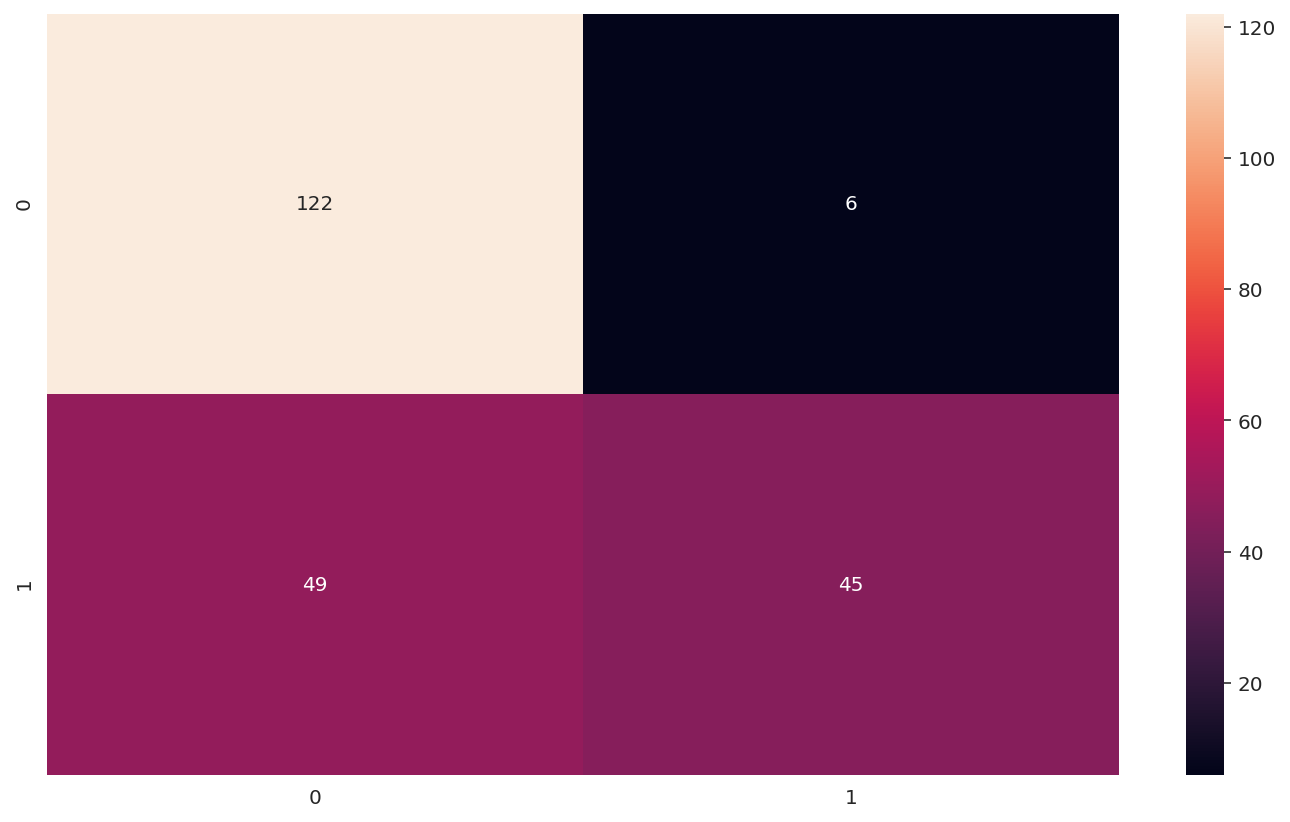

In [24]:
sns.heatmap(cmatrix1, annot=True, fmt='d')

In [25]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.82       128
           1       0.88      0.48      0.62        94

    accuracy                           0.75       222
   macro avg       0.80      0.72      0.72       222
weighted avg       0.78      0.75      0.73       222



##### Model 2 - Support Vector Machines

In [26]:
y_true = y_test
y_pred = titanic_model2.predict(x_test)
cmatrix2=confusion_matrix(y_true, y_pred)

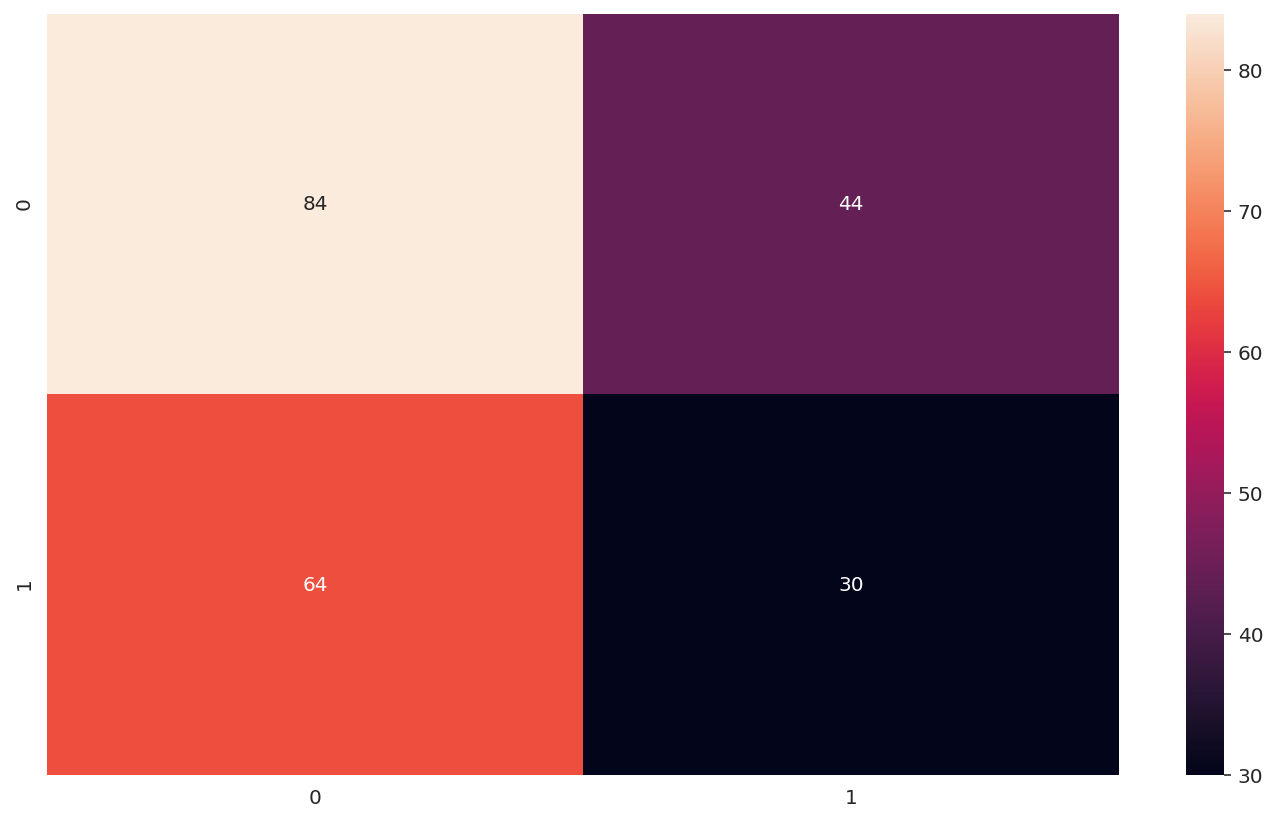

In [27]:
sns.heatmap(cmatrix2, annot=True, fmt='d')

In [28]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.66      0.61       128
           1       0.41      0.32      0.36        94

    accuracy                           0.51       222
   macro avg       0.49      0.49      0.48       222
weighted avg       0.50      0.51      0.50       222



##### Model 3 - Logistic Regression

In [29]:
y_true = y_test
y_pred = titanic_model3.predict(x_test)
cmatrix3=confusion_matrix(y_true, y_pred)

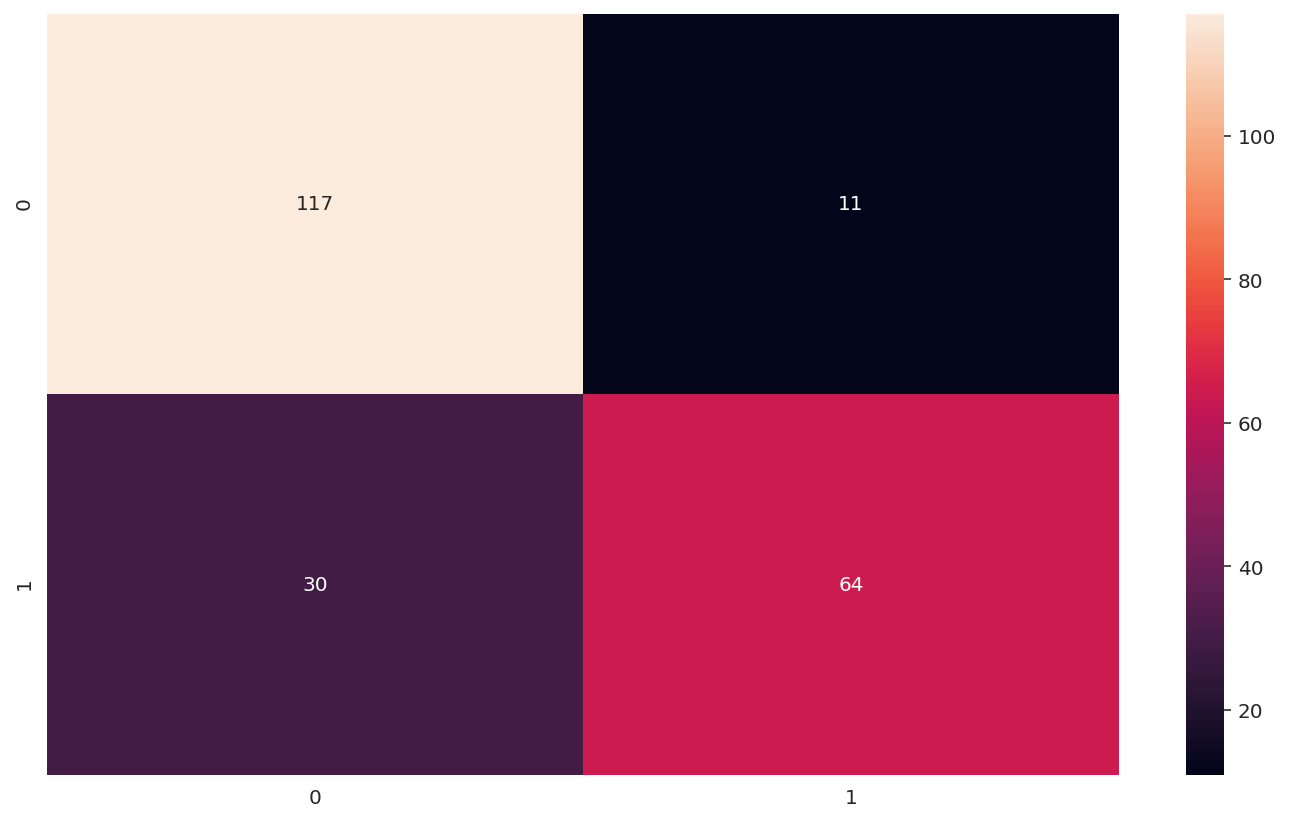

In [30]:
sns.heatmap(cmatrix3, annot=True, fmt='d')

In [31]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       128
           1       0.85      0.68      0.76        94

    accuracy                           0.82       222
   macro avg       0.82      0.80      0.80       222
weighted avg       0.82      0.82      0.81       222



##### Which model is best?
After performing model evaluation on the three models, which model does the best job of predicting survivability on the titanic in your opinion? Write your answer in markdown here:
<br>





## Problem 6: Bonus Model!

#### Model 4 Decision Trees and Random Forests
Now we will look into a different way of thinking for classification problems: decision trees and random forests, which are incredible ways to understand a dataset. These videos get a little math-y but I think they do a good job explaining decision trees and random forest and why they are great ways to break down a classification problem.
- Homework: Check out this video for [Decision Trees](https://www.youtube.com/watch?v=ZVR2Way4nwQ)
- Homework: Check out this video for [Random Forests](https://www.youtube.com/watch?v=v6VJ2RO66Ag)
- Homework: Read up on the SK Learn Documentation for [Random Forest Classifiers](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
- Homework: Fit a Random Forest Classifier on the data and name your classifier `tree_model`. Set parameters for the model to have have 100 estimators, and a max depth of 4.
- Homework: After fitting the model, use the code block below to plot your n-th tree.


In [33]:
 from sklearn.ensemble import RandomForestClassifier
#here
#create model
titanic_model4 = RandomForestClassifier(n_estimators=500, max_depth=5)

#fit model
titanic_model4.fit(x_train, y_train)

#predict
y_hat=titanic_model4.predict(x_test)

#score
score = titanic_model4.score(x_test, y_test)
print(score)

0.8558558558558559


##### Plotting
Now that you have fit the model, we will plot the 10th decision tree in tree_model's random forest, and the code is given to you below. Note: this code is adapted from [this article](https://mljar.com/blog/visualize-tree-from-random-forest/).

[Text(883.5, 1494.8999999999999, 'Sex <= 0.5\ngini = 0.464\nsamples = 422\nvalue = [422, 243]'),
 Text(441.75, 1223.1, 'Pclass <= 2.5\ngini = 0.396\nsamples = 147\nvalue = [64, 171]'),
 Text(139.5, 951.3, 'Age <= 23.5\ngini = 0.108\nsamples = 80\nvalue = [7, 115]'),
 Text(93.0, 679.4999999999999, 'gini = 0.0\nsamples = 13\nvalue = [0, 23]'),
 Text(186.0, 679.4999999999999, 'Age <= 27.5\ngini = 0.131\nsamples = 67\nvalue = [7, 92]'),
 Text(93.0, 407.6999999999998, 'Pclass <= 1.5\ngini = 0.332\nsamples = 11\nvalue = [4, 15]'),
 Text(46.5, 135.89999999999986, 'gini = 0.375\nsamples = 3\nvalue = [1, 3]'),
 Text(139.5, 135.89999999999986, 'gini = 0.32\nsamples = 8\nvalue = [3, 12]'),
 Text(279.0, 407.6999999999998, 'Pclass <= 1.5\ngini = 0.072\nsamples = 56\nvalue = [3, 77]'),
 Text(232.5, 135.89999999999986, 'gini = 0.073\nsamples = 37\nvalue = [2, 51]'),
 Text(325.5, 135.89999999999986, 'gini = 0.071\nsamples = 19\nvalue = [1, 26]'),
 Text(744.0, 951.3, 'Age <= 27.5\ngini = 0.5\nsamples =

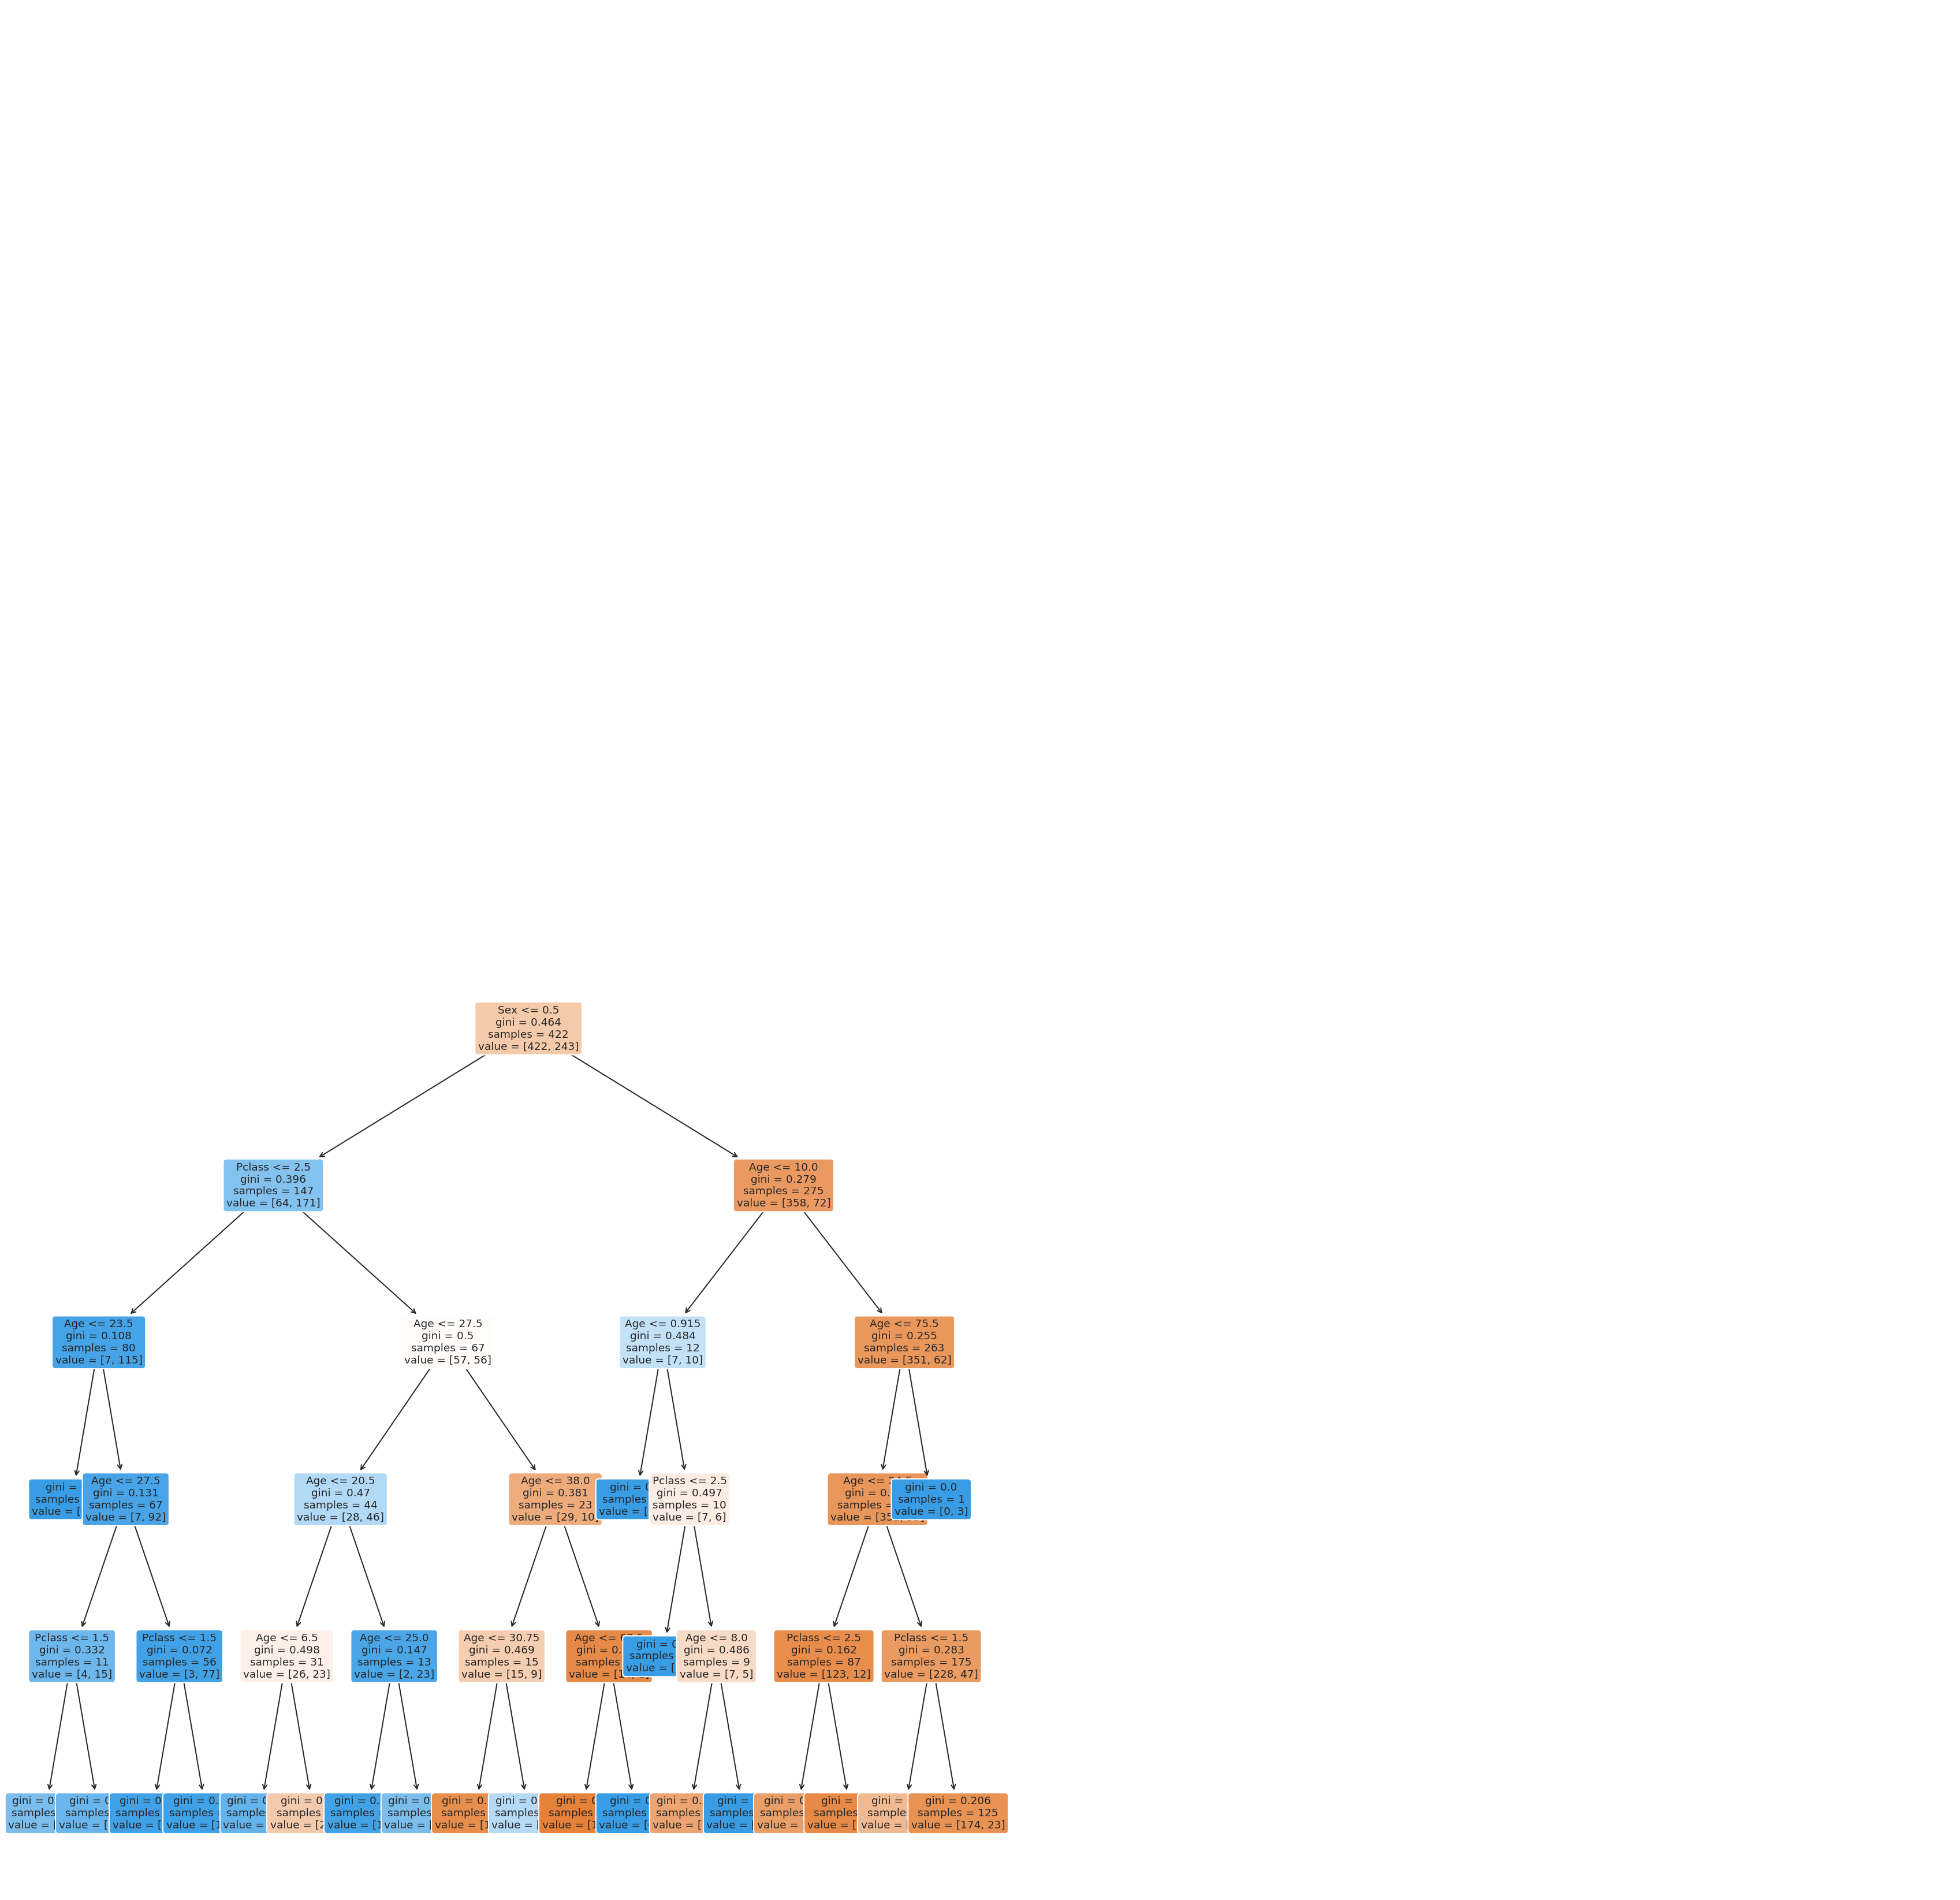

In [35]:
from sklearn.tree import plot_tree
n = 499
fig = plt.figure(figsize=(30, 30))
plot_tree(titanic_model4.estimators_[n], feature_names=inputs, filled=True, impurity=True, rounded=True)